In [7]:
# importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('heat_exchanger_data.csv')

In [9]:
df.head()

,T_hot_in,T_hot_out,T_cold_in,T_cold_out,Flow_rate_hot,Flow_rate_cold
0,331.236204,300.628584,292.840633,301.033634,10.515619,10.792647
1,348.521429,312.728208,281.682799,310.627093,14.512765,10.144385
2,341.959818,306.287120,283.232574,310.812702,12.526262,9.238110
3,337.959754,310.171414,297.971084,312.748598,14.132287,11.255180
4,324.680559,318.151329,292.128581,314.521827,11.600248,10.738925


In [10]:
df.isnull().sum()

T_hot_in          0
T_hot_out         0
T_cold_in         0
T_cold_out        0
Flow_rate_hot     0
Flow_rate_cold    0
dtype: int64

In [11]:
df.describe()

,T_hot_in,T_hot_out,T_cold_in,T_cold_out,Flow_rate_hot,Flow_rate_cold
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,334.105422,309.956634,290.352027,309.822979,12.580229,10.101199
std,8.924682,5.862225,5.868525,5.869044,1.593004,1.188488
min,320.165663,300.139043,280.101232,300.287870,10.054188,8.058179
25%,325.796023,304.840090,285.537597,304.992298,11.319674,9.022081
50%,333.924274,310.112497,291.251099,310.194366,12.626997,10.112808
75%,341.906094,315.323672,295.047339,314.715550,13.984421,11.244561
max,349.606608,319.713009,299.801077,319.810103,14.964824,11.998871


In [13]:
# Calculate temperature differences
df['Delta_T1'] = df['T_hot_in'] - df['T_cold_out']
df['Delta_T2'] = df['T_hot_out'] - df['T_cold_in']

In [15]:
# Log Mean Temperature Difference (LMTD)
df['LMTD'] = (df['Delta_T1'] - df['Delta_T2']) / np.log(df['Delta_T1'] / df['Delta_T2'])

In [16]:
C_p_hot = 1.38   # Sulfuric Acid  
C_p_cold = 4.18  # Water

In [18]:
# Calculating heat duty for hot stream (Q = m * Cp * ΔT)
df['Heat_duty_hot'] = df['Flow_rate_hot'] * C_p_hot * (df['T_hot_in'] - df['T_hot_out'])

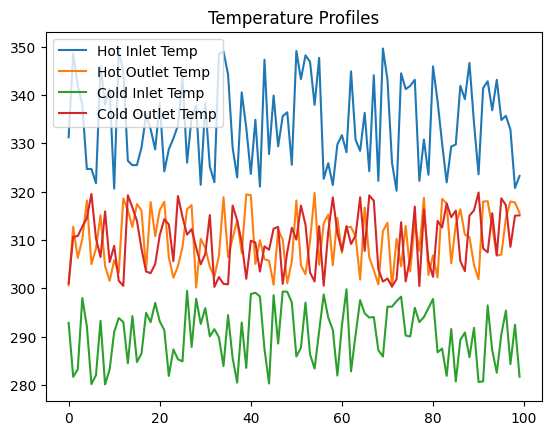

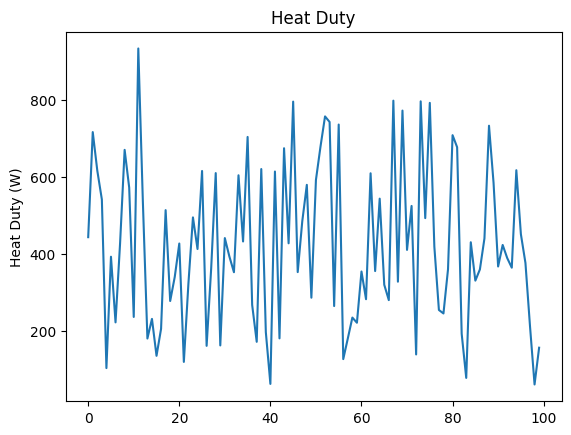

In [34]:
# Visualize temperature profiles
plt.plot(df['T_hot_in'], label='Hot Inlet Temp')
plt.plot(df['T_hot_out'], label='Hot Outlet Temp')
plt.plot(df['T_cold_in'], label='Cold Inlet Temp')
plt.plot(df['T_cold_out'], label='Cold Outlet Temp')
plt.legend()
plt.title('Temperature Profiles')
plt.show()

# Visualize heat duty
plt.plot(df['Heat_duty_hot'])
plt.title('Heat Duty')
plt.ylabel('Heat Duty (W)')
plt.show()

In [26]:
# Calculate the overall heat transfer coefficient (U)
surface_area = 180 # metre square
df['U'] = df['Heat_duty_hot'] / (surface_area * df['LMTD'])

In [27]:
df['U'].mean()

0.12533118142070232

In [29]:
df['Efficiency'] = df['Heat_duty_hot'] / 5000

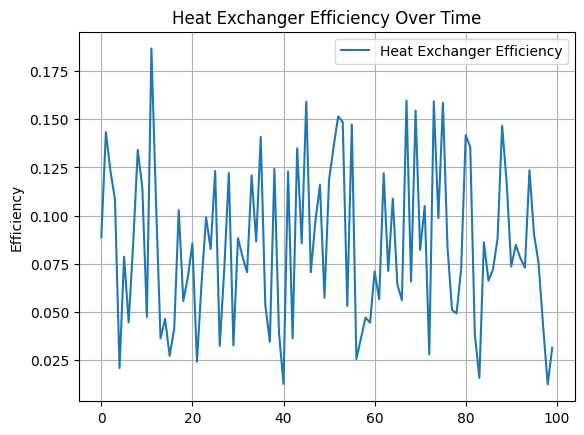

In [33]:
plt.plot(df['Efficiency'], label='Heat Exchanger Efficiency')
plt.title('Heat Exchanger Efficiency Over Time')
plt.ylabel('Efficiency')
plt.legend()
plt.grid(True)
plt.show()

ANALYSIS REPORT

1. The heat exchanger's performance is inefficient with a low heat transfer coefficient of 0.12 W/m²°C. 
2. Efficiency fluctuates between 0.025 and 0.175 
3. heat duty varies from 100 W to 800 W, indicating operational instability. 

Optimization Potential: Despite the underperformance, there are clear opportunities for optimization. Cleaning the heat exchanger to reduce fouling, stabilizing flow rates, and better controlling inlet temperatures would lead to a more consistent and higher heat transfer rate.